In [167]:
import pandas as pd

In [168]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [169]:
pais = ["Libya"]
df_filtrado = df[df["Entity"].isin(pais)]

In [170]:
# Verificando se está pegando o pais de escolha
# print(df_filtrado.head())

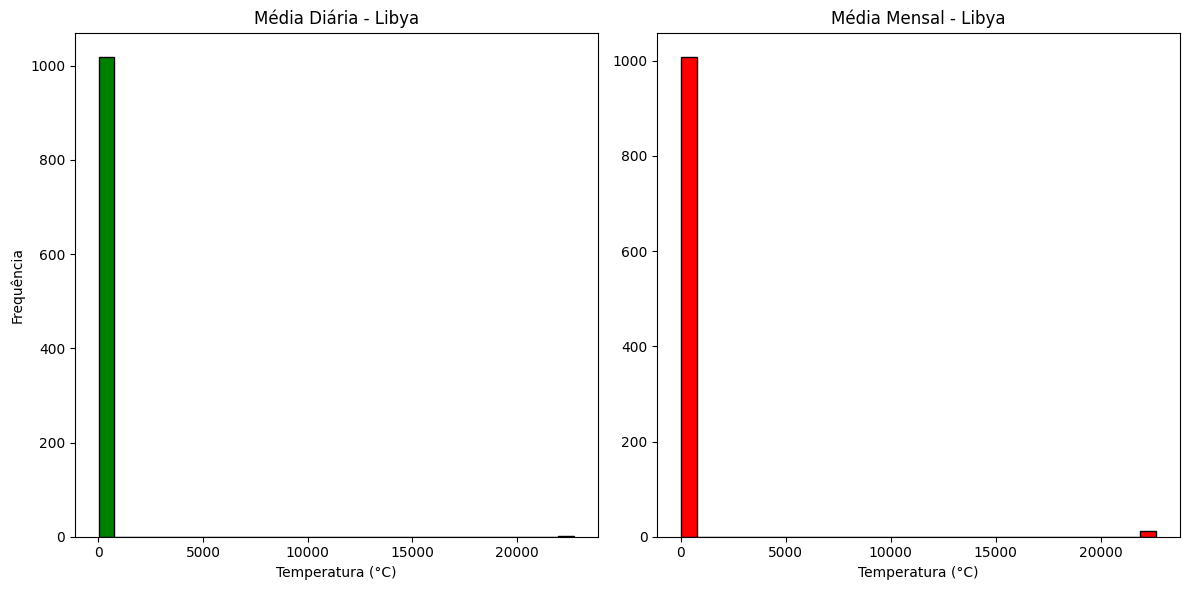

In [171]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Libya", df_filtrado)

In [172]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(df_filtrado['Average surface temperature daily'], 1.7)
outliers_mensal = identificar_outliers(df_filtrado['Average surface temperature monthly'], 1.7)

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 108273    22736.0
Name: Average surface temperature daily, dtype: float64

Outliers mensais:
 109068    22648.0
109069    22648.0
109070    22648.0
109071    22648.0
109072    22648.0
109073    22648.0
109074    22648.0
109075    22648.0
109076    22648.0
109077    22648.0
109078    22648.0
109079    22648.0
Name: Average surface temperature monthly, dtype: float64


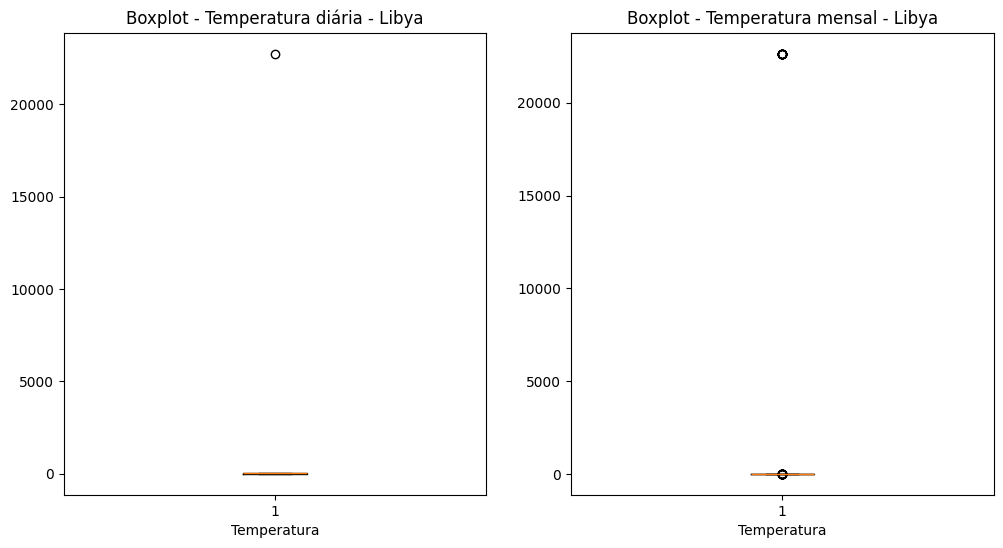

In [173]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Libya", df_filtrado)

In [174]:
# Identificando outliers limite superior
from Funcoes import identificar_outliers_limite_superior

outliers_diario_superior = identificar_outliers_limite_superior(df_filtrado['Average surface temperature daily'])
outliers_mensal_superior = identificar_outliers_limite_superior(df_filtrado['Average surface temperature monthly'])
print(outliers_diario_superior)
print(outliers_mensal_superior)

108273    22736.0
Name: Average surface temperature daily, dtype: float64
109068    22648.0
109069    22648.0
109070    22648.0
109071    22648.0
109072    22648.0
109073    22648.0
109074    22648.0
109075    22648.0
109076    22648.0
109077    22648.0
109078    22648.0
109079    22648.0
Name: Average surface temperature monthly, dtype: float64


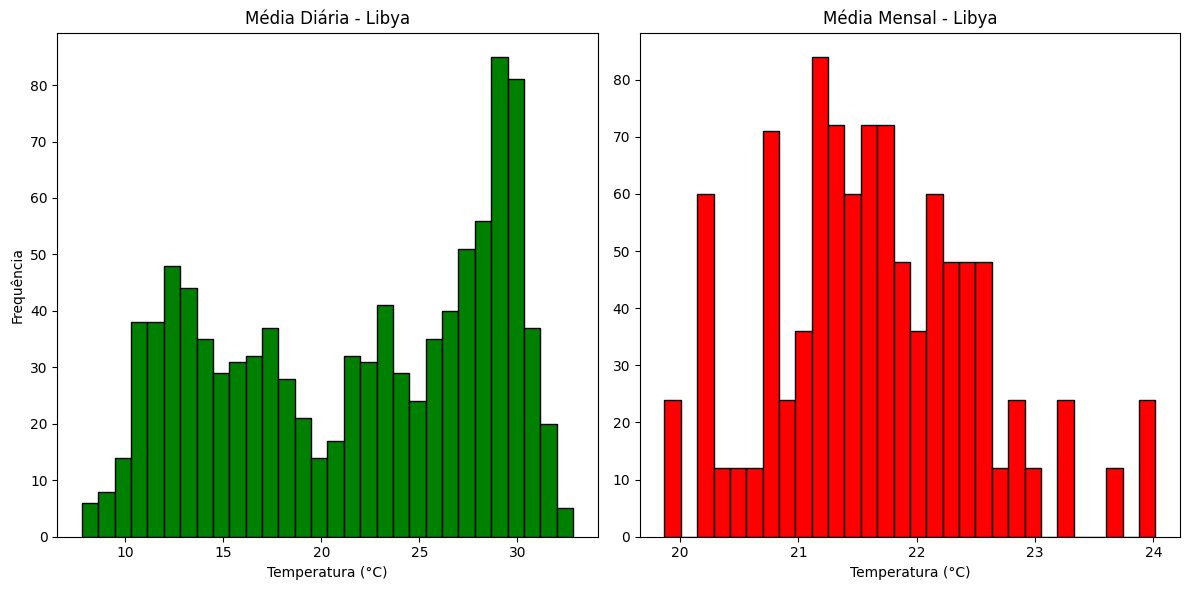

In [ ]:
df_sem_outliers = df_filtrado[~df_filtrado['Average surface temperature daily'].isin(outliers_diario_superior)]
df_sem_outliers = df_sem_outliers[~df_sem_outliers['Average surface temperature monthly'].isin(outliers_mensal_superior)]

gerar_histogramas("Libya", df_sem_outliers)

In [176]:
# Importar metódo de análise de periodo
from Funcoes import analisar_periodo

mes_inicial, mes_final = analisar_periodo(df_sem_outliers, 'Day')



Período de análise:
Primeiro mês: 1940-01
Último mês: 2024-12


In [177]:
# Importar função para identificação de meses faltantes
from Funcoes import identificar_meses_faltantes

identificar_meses_faltantes(df_sem_outliers, 'Day')


Meses faltantes: 13
- 1952-10
- 2019-01
- 2019-02
- 2019-03
- 2019-04
- 2019-05
- 2019-06
- 2019-07
- 2019-08
- 2019-09
- 2019-10
- 2019-11
- 2019-12


PeriodIndex(['1952-10', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
             '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
             '2019-12'],
            dtype='period[M]')

In [178]:
# Importar função de interpolarção de dados
from Funcoes import interpolar_dados 

df_sem_outliers = interpolar_dados(df_sem_outliers) 

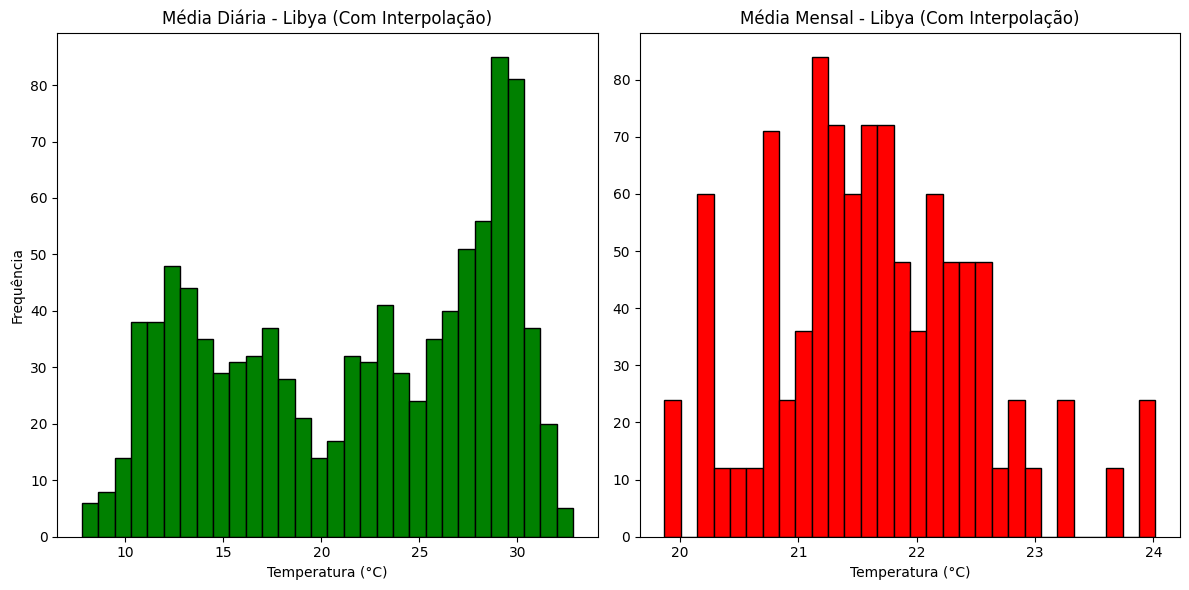

In [179]:
gerar_histogramas('Libya (Com Interpolação)', df_sem_outliers)